In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
print(data_dir)

/Users/mkiyota1/.keras/datasets/flower_photos


3670


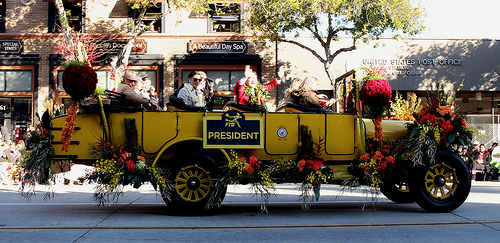

In [40]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

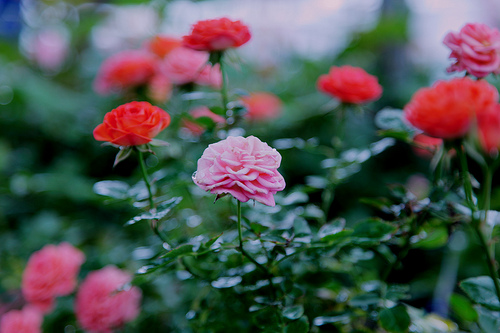

In [41]:
PIL.Image.open(str(roses[1]))

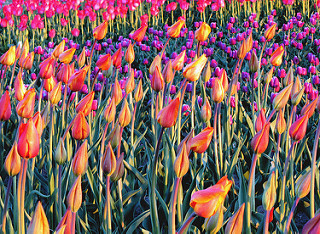

In [42]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

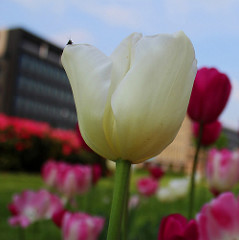

In [43]:
PIL.Image.open(str(tulips[1]))

In [44]:
batch_size = 32
img_height = 180
img_width = 180

In [45]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
#
# # Apply data augmentation
# train_datagen = ImageDataGenerator(
#       rescale=1./255,
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')
#
# validation_datagen = ImageDataGenerator(rescale=1/255)

In [46]:
# Flow training images in batches of 128 using train_datagen generator
train_generator = tf.keras.utils.image_dataset_from_directory(
        data_dir,  # This is the source directory for training images
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(img_height, img_width),  # All images will be resized to 150x150
        batch_size=batch_size
        # Since we use binary_crossentropy loss, we need binary labels
        )

# Flow training images in batches of 128 using train_datagen generator
validation_generator = tf.keras.utils.image_dataset_from_directory(
        data_dir,  # This is the source directory for training images
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(img_height, img_width),  # All images will be resized to 150x150
        batch_size=batch_size
        # Since we use binary_crossentropy loss, we need binary labels
        )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [47]:
num_classes = 5

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 45, 45, 64)       

In [50]:
epochs=10
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=8,
    epochs=epochs,
)

Epoch 1/10
8/8 [==============================] - 6s 651ms/step - loss: 1.8194 - accuracy: 0.2891 - val_loss: 1.5557 - val_accuracy: 0.3842
Epoch 2/10
8/8 [==============================] - 5s 639ms/step - loss: 1.4614 - accuracy: 0.3789 - val_loss: 1.4092 - val_accuracy: 0.3883
Epoch 3/10
8/8 [==============================] - 5s 639ms/step - loss: 1.3295 - accuracy: 0.4336 - val_loss: 1.3171 - val_accuracy: 0.4578
Epoch 4/10
8/8 [==============================] - 5s 627ms/step - loss: 1.2795 - accuracy: 0.4609 - val_loss: 1.2092 - val_accuracy: 0.5041
Epoch 5/10
8/8 [==============================] - 5s 642ms/step - loss: 1.3142 - accuracy: 0.4258 - val_loss: 1.1656 - val_accuracy: 0.5395
Epoch 6/10
8/8 [==============================] - 5s 626ms/step - loss: 1.1996 - accuracy: 0.4805 - val_loss: 1.1235 - val_accuracy: 0.5436
Epoch 7/10
8/8 [==============================] - 5s 638ms/step - loss: 1.1204 - accuracy: 0.5508 - val_loss: 1.1388 - val_accuracy: 0.5313
Epoch 8/10
8/8 [====

In [51]:
history.history

{'loss': [1.8193917274475098,
  1.4613747596740723,
  1.3295212984085083,
  1.2795032262802124,
  1.314246654510498,
  1.1995636224746704,
  1.120417594909668,
  1.206231713294983,
  1.1743979454040527,
  1.232535719871521],
 'accuracy': [0.2890625,
  0.37890625,
  0.43359375,
  0.4609375,
  0.42578125,
  0.48046875,
  0.55078125,
  0.46875,
  0.4765625,
  0.50390625],
 'val_loss': [1.555667757987976,
  1.4091767072677612,
  1.3171217441558838,
  1.2091810703277588,
  1.165554165840149,
  1.1235466003417969,
  1.1388453245162964,
  1.1433570384979248,
  1.1320465803146362,
  1.1011114120483398],
 'val_accuracy': [0.3841961920261383,
  0.388283371925354,
  0.4577656686306,
  0.5040872097015381,
  0.5395095348358154,
  0.5435967445373535,
  0.531335175037384,
  0.528610348701477,
  0.5108991861343384,
  0.5667575001716614]}

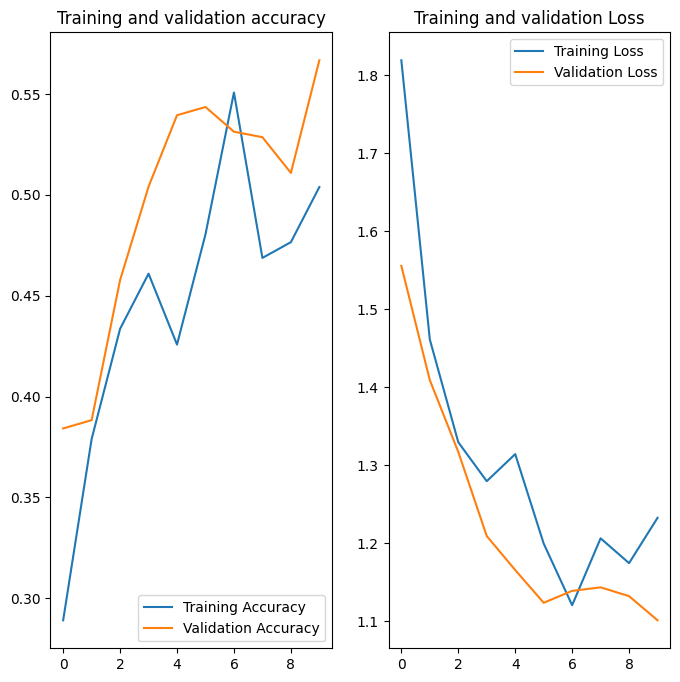

In [52]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs
plt.figure(figsize=(8, 8))

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title ('Training and validation accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation Loss')

plt.show()

In [53]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

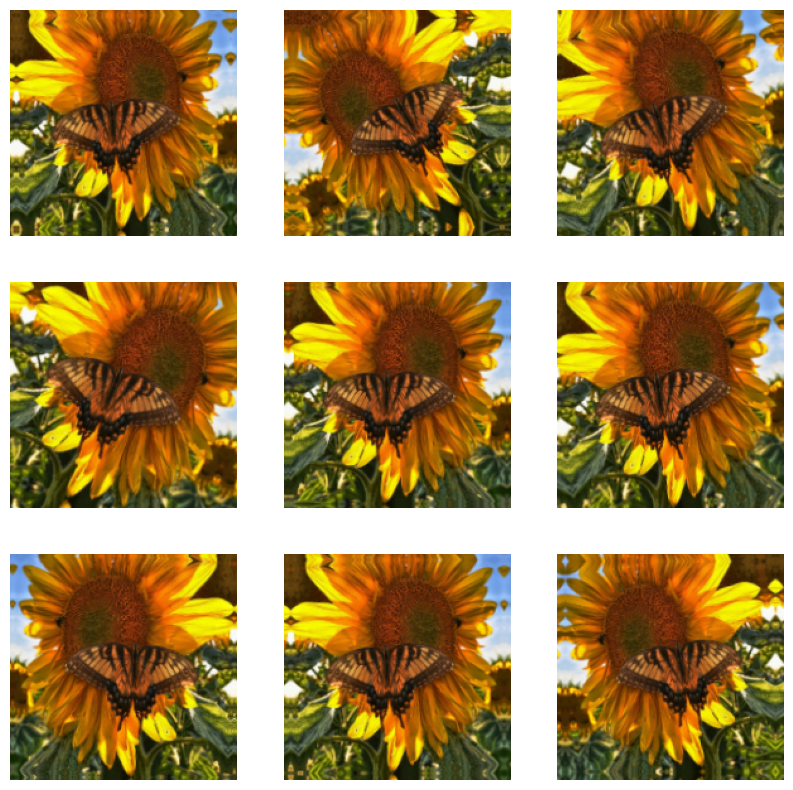

In [55]:
plt.figure(figsize=(10, 10))
for images, _ in train_generator.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [56]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
epochs=10
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=8,
    epochs=epochs,
)

Epoch 1/10
8/8 [==============================] - 6s 687ms/step - loss: 1.7771 - accuracy: 0.3047 - val_loss: 1.5899 - val_accuracy: 0.2425
Epoch 2/10
8/8 [==============================] - 5s 668ms/step - loss: 1.5084 - accuracy: 0.2617 - val_loss: 1.4703 - val_accuracy: 0.3760
Epoch 3/10
8/8 [==============================] - 5s 691ms/step - loss: 1.4239 - accuracy: 0.4414 - val_loss: 1.2819 - val_accuracy: 0.4619
Epoch 4/10
8/8 [==============================] - 5s 703ms/step - loss: 1.2452 - accuracy: 0.4609 - val_loss: 1.1954 - val_accuracy: 0.4918
Epoch 5/10
8/8 [==============================] - 5s 681ms/step - loss: 1.1969 - accuracy: 0.4609 - val_loss: 1.3068 - val_accuracy: 0.4510
Epoch 6/10
8/8 [==============================] - 6s 761ms/step - loss: 1.2743 - accuracy: 0.4727 - val_loss: 1.1961 - val_accuracy: 0.5177
Epoch 7/10
8/8 [==============================] - 6s 789ms/step - loss: 1.1995 - accuracy: 0.5156 - val_loss: 1.1642 - val_accuracy: 0.5341
Epoch 8/10
8/8 [====

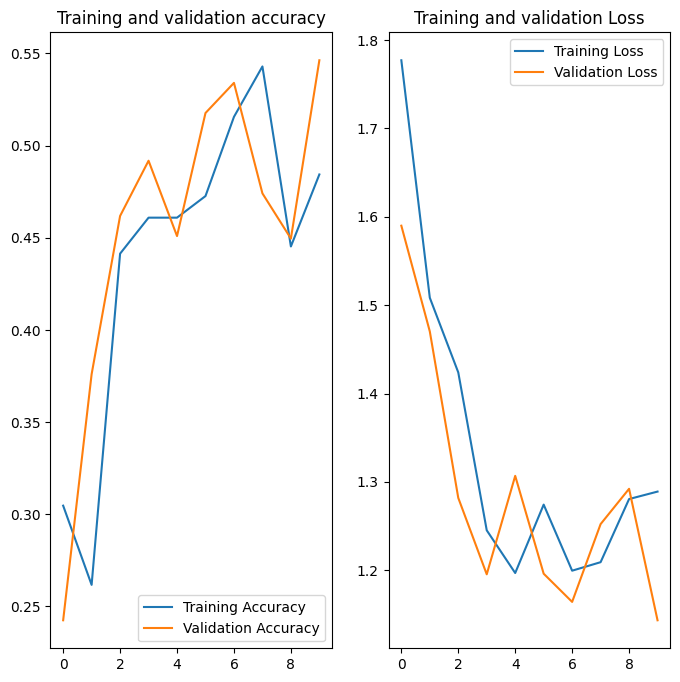

In [59]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs
plt.figure(figsize=(8, 8))

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title ('Training and validation accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation Loss')

plt.show()